<a href="https://colab.research.google.com/github/sshreeshantha22cs131nc-cloud/samsung_shreeshanth/blob/main/breastcancer_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                           roc_curve, auc, precision_recall_curve)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [2]:
# ## 1. Dataset Overview & Exploration

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
target_names = data.target_names

In [3]:
# Create DataFrame for easier manipulation
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['diagnosis'] = df['target'].map({0: 'Malignant', 1: 'Benign'})

In [8]:
print("📊 DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset shape: {df.shape}")
print(f"Features: {len(feature_names)}")
print(f"Target classes: {target_names}")
print(f"Feature names: {list(feature_names)}")

📊 DATASET OVERVIEW
Dataset shape: (569, 32)
Features: 30
Target classes: ['malignant' 'benign']
Feature names: [np.str_('mean radius'), np.str_('mean texture'), np.str_('mean perimeter'), np.str_('mean area'), np.str_('mean smoothness'), np.str_('mean compactness'), np.str_('mean concavity'), np.str_('mean concave points'), np.str_('mean symmetry'), np.str_('mean fractal dimension'), np.str_('radius error'), np.str_('texture error'), np.str_('perimeter error'), np.str_('area error'), np.str_('smoothness error'), np.str_('compactness error'), np.str_('concavity error'), np.str_('concave points error'), np.str_('symmetry error'), np.str_('fractal dimension error'), np.str_('worst radius'), np.str_('worst texture'), np.str_('worst perimeter'), np.str_('worst area'), np.str_('worst smoothness'), np.str_('worst compactness'), np.str_('worst concavity'), np.str_('worst concave points'), np.str_('worst symmetry'), np.str_('worst fractal dimension')]


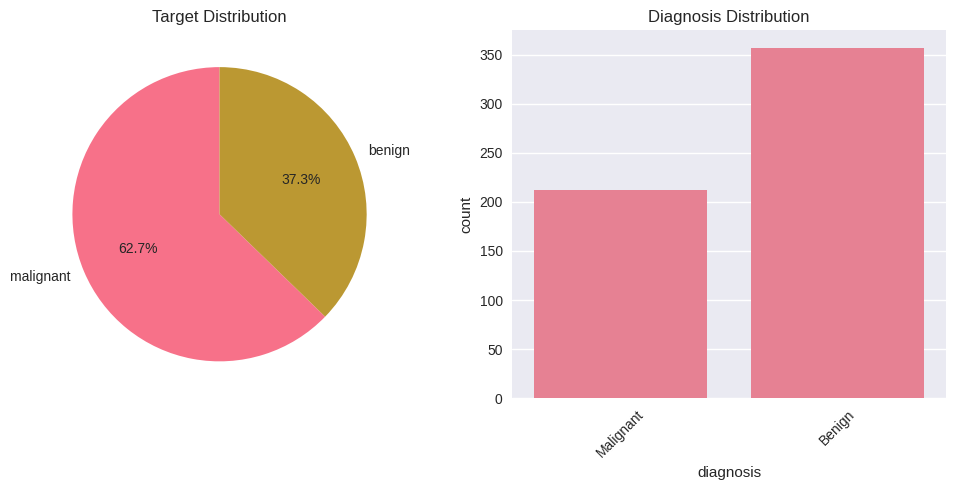


📈 CLASS DISTRIBUTION:
Benign cases: 357 (62.7%)
Malignant cases: 212 (37.3%)


In [10]:
#datset understanding
# Let's explore the target distribution
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)

class_counts = df['target'].value_counts()

plt.pie(class_counts.values,
        labels=target_names,
        autopct='%1.1f%%',
        startangle=90)

plt.title('Target Distribution')

plt.subplot(1, 2, 2)

sns.countplot(data=df, x='diagnosis')

plt.title('Diagnosis Distribution')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

print("\n📈 CLASS DISTRIBUTION:")
print(f"Benign cases: {class_counts[1]} ({class_counts[1]/len(df)*100:.1f}%)")
print(f"Malignant cases: {class_counts[0]} ({class_counts[0]/len(df)*100:.1f}%)")

📋 BASIC STATISTICS

Mean values for key features by diagnosis:


,Feature,Malignant,Benign,Difference
0,mean radius,17.462830,12.146524,-5.316306
1,mean texture,21.604906,17.914762,-3.690144
2,mean perimeter,115.365377,78.075406,-37.289971
3,mean area,978.376415,462.790196,-515.586219


In [11]:
# ## 2. Data Visualization & Correlation Analysis

# Select key features for visualization
key_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
                'mean smoothness', 'mean compactness']


🔄 Generating pairplot... (This may take a moment)


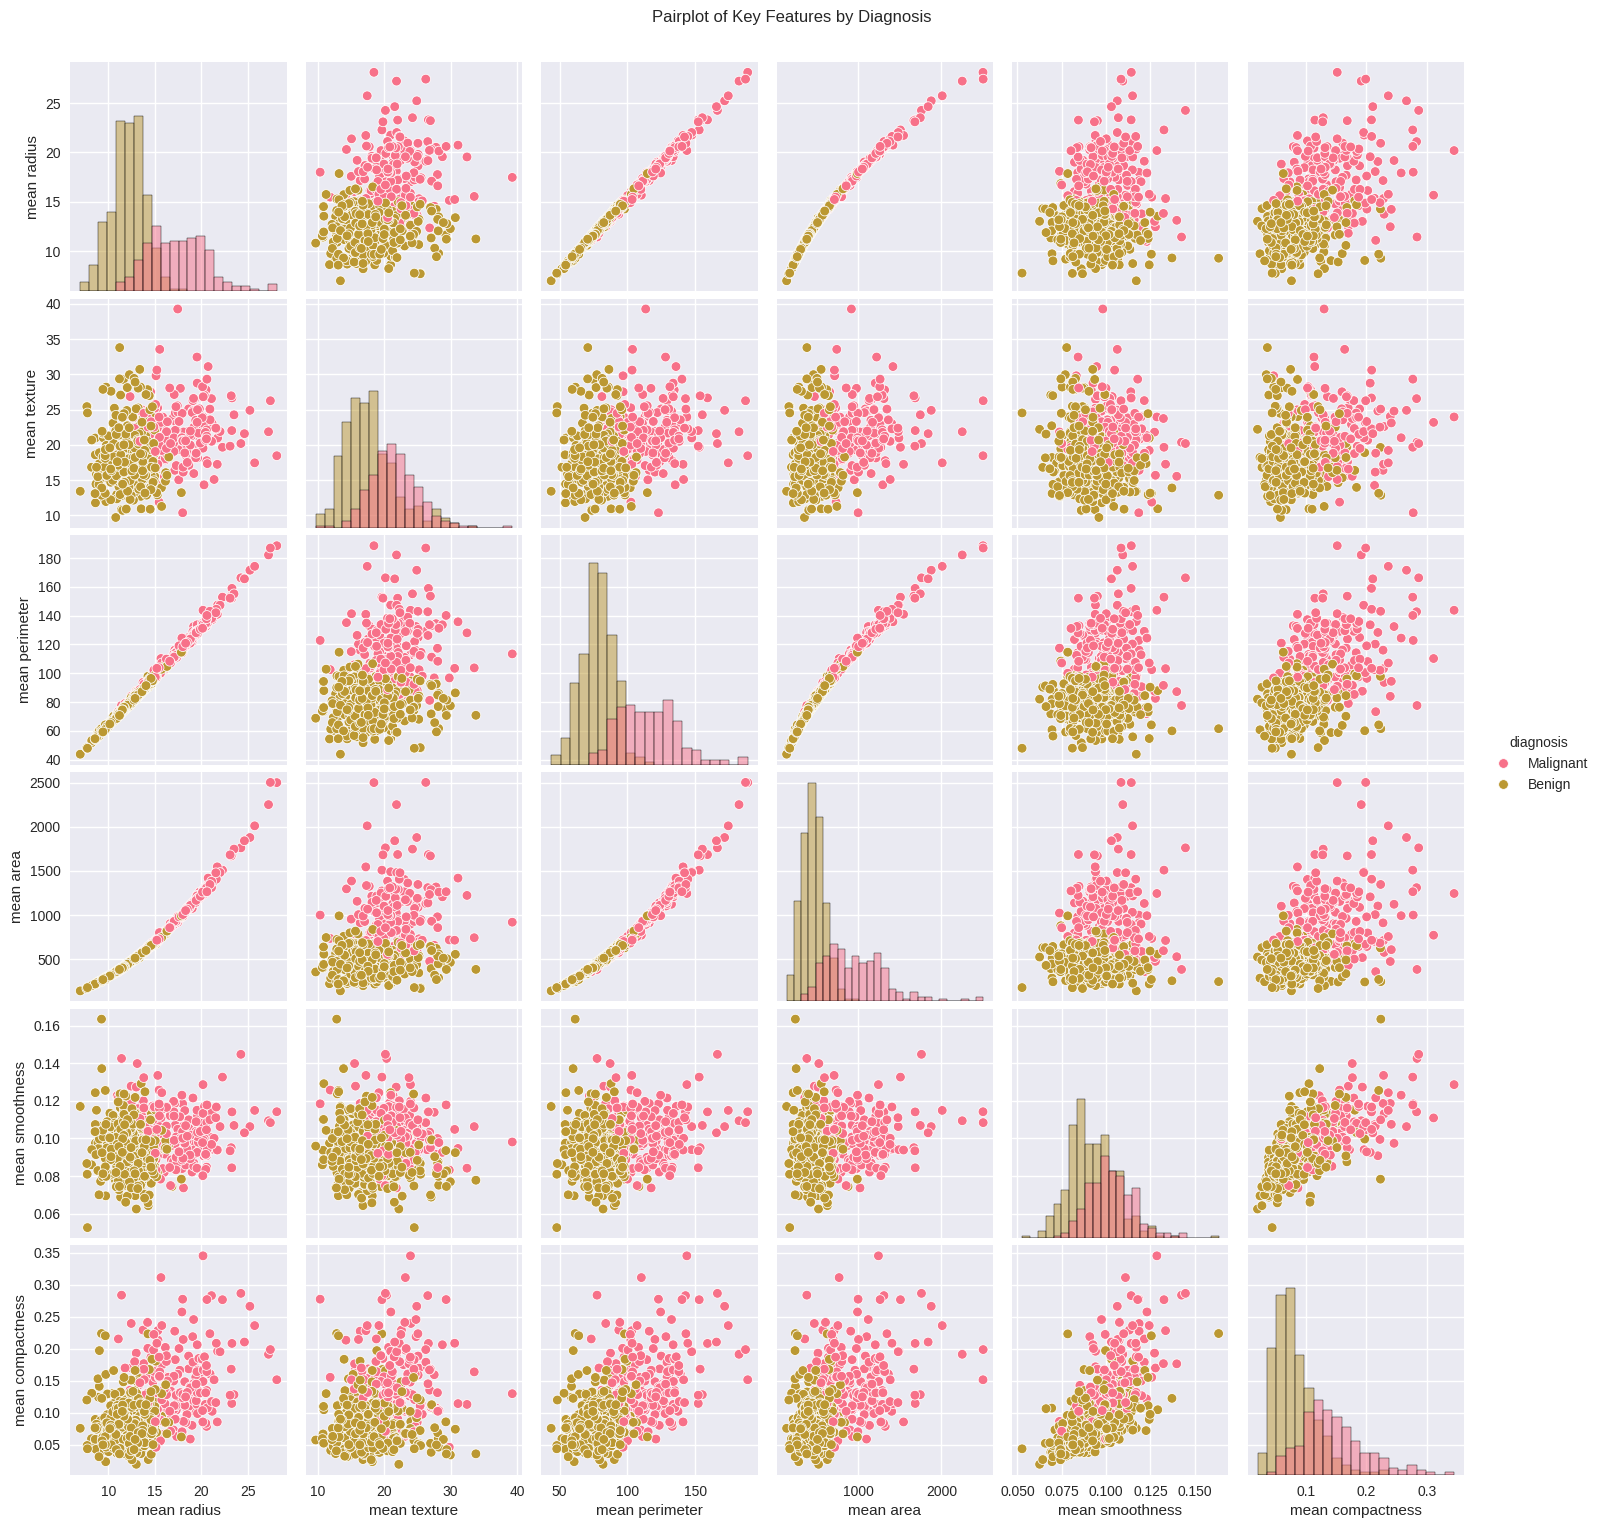

In [12]:
# Pairplot of key features
print("🔄 Generating pairplot... (This may take a moment)")
sns.pairplot(df, vars=key_features, hue='diagnosis', diag_kind='hist')
plt.suptitle('Pairplot of Key Features by Diagnosis', y=1.02)
plt.show()


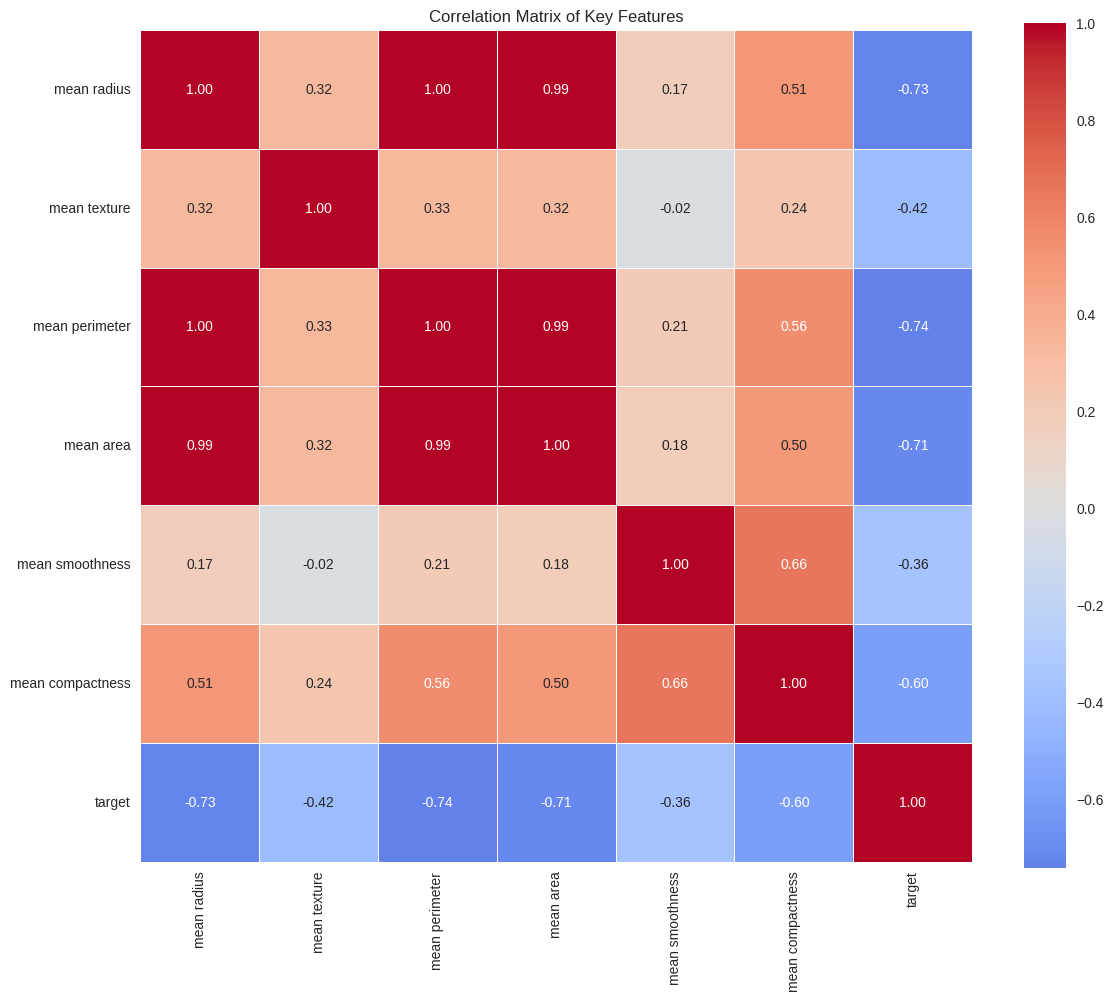

In [13]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df[key_features + ['target']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Key Features')
plt.tight_layout()
plt.show()

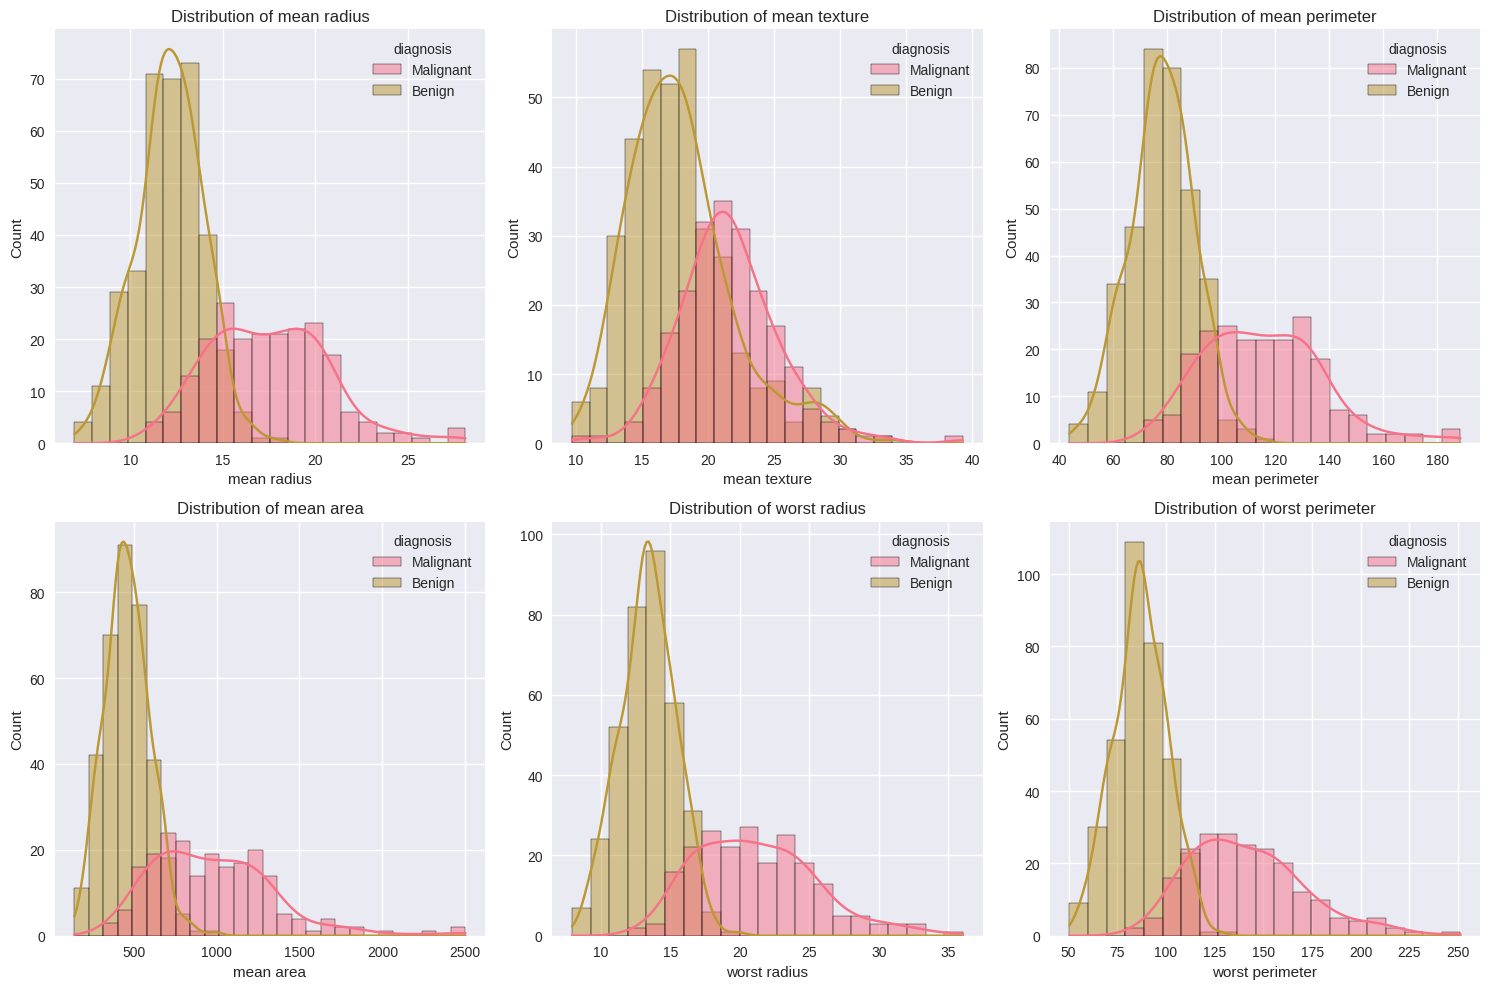

In [14]:
# Distribution of top features by diagnosis
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
top_features = ['mean radius', 'mean texture', 'mean perimeter',
                'mean area', 'worst radius', 'worst perimeter']

for idx, feature in enumerate(top_features):
    row, col = idx // 3, idx % 3
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [15]:
# ## 3. Data Preprocessing


# Prepare features and target
X = df.drop(['target', 'diagnosis'], axis=1)
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("📊 DATA PREPROCESSING SUMMARY")
print("=" * 50)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training set - Benign: {y_train.sum()}, Malignant: {len(y_train)-y_train.sum()}")
print(f"Testing set - Benign: {y_test.sum()}, Malignant: {len(y_test)-y_test.sum()}")

📊 DATA PREPROCESSING SUMMARY
Training set shape: (398, 30)
Testing set shape: (171, 30)
Training set - Benign: 250, Malignant: 148
Testing set - Benign: 107, Malignant: 64


In [16]:
# ## 4. Logistic Regression Model

# %%
# Initialize and train logistic regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1 (benign)

print("✅ MODEL TRAINING COMPLETE!")
print("=" * 50)
print(f"Model coefficients: {len(logreg.coef_[0])}")
print(f"Model intercept: {logreg.intercept_[0]:.4f}")



✅ MODEL TRAINING COMPLETE!
Model coefficients: 30
Model intercept: 0.2146


📈 TOP 10 MOST IMPORTANT FEATURES


,feature,coefficient,abs_coefficient
21,worst texture,-1.226329,1.226329
27,worst concave points,-0.996807,0.996807
23,worst area,-0.954956,0.954956
20,worst radius,-0.941060,0.941060
13,area error,-0.937493,0.937493
10,radius error,-0.886370,0.886370
28,worst symmetry,-0.869444,0.869444
26,worst concavity,-0.785989,0.785989
24,worst smoothness,-0.748971,0.748971
22,worst perimeter,-0.731042,0.731042


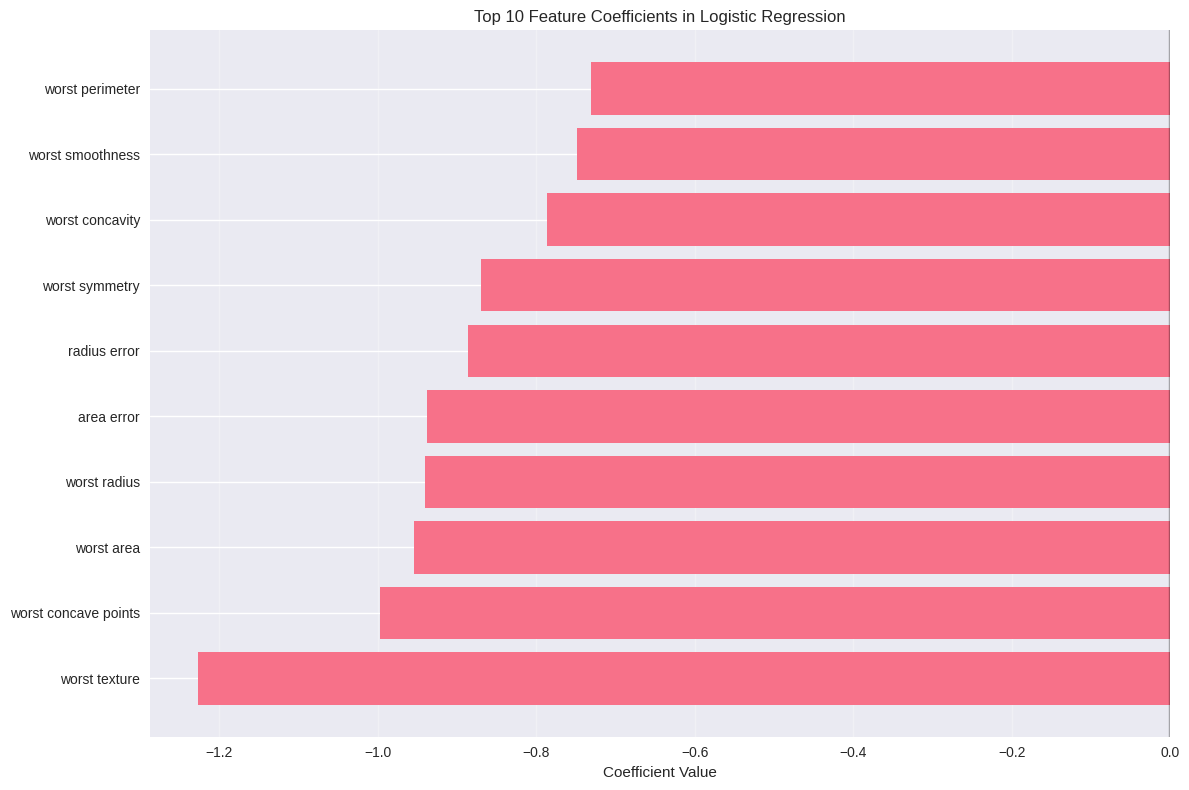

In [17]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': logreg.coef_[0],
    'abs_coefficient': np.abs(logreg.coef_[0])
}).sort_values('abs_coefficient', ascending=False)

print("📈 TOP 10 MOST IMPORTANT FEATURES")
print("=" * 50)
display(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_10_features = feature_importance.head(10).sort_values('coefficient', ascending=True)
plt.barh(top_10_features['feature'], top_10_features['coefficient'])
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.xlabel('Coefficient Value')
plt.title('Top 10 Feature Coefficients in Logistic Regression')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


📊 MODEL PERFORMANCE REPORT
Accuracy: 0.9883
Precision (Malignant): 0.9907
Recall (Malignant): 0.9907

📋 CONFUSION MATRIX:


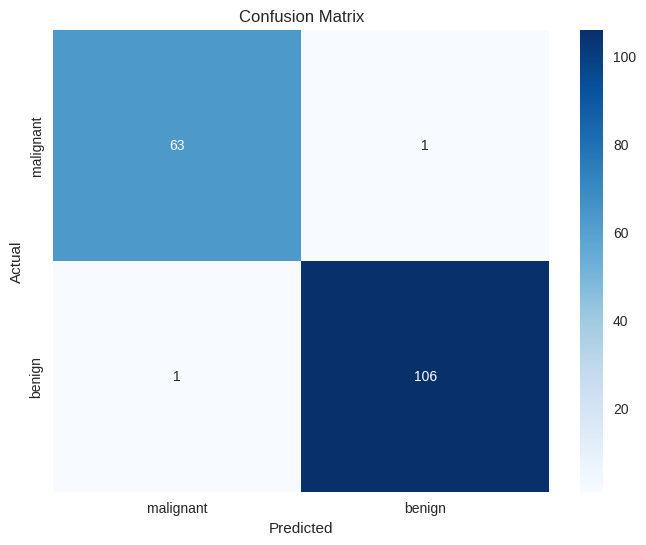


📝 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        64
      benign       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [18]:
# ## 5. Model Evaluation

# %%
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=target_names)

print("📊 MODEL PERFORMANCE REPORT")
print("=" * 50)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Malignant): {conf_matrix[1,1]/(conf_matrix[1,1] + conf_matrix[0,1]):.4f}")
print(f"Recall (Malignant): {conf_matrix[1,1]/(conf_matrix[1,1] + conf_matrix[1,0]):.4f}")

print("\n📋 CONFUSION MATRIX:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\n📝 CLASSIFICATION REPORT:")
print(class_report)



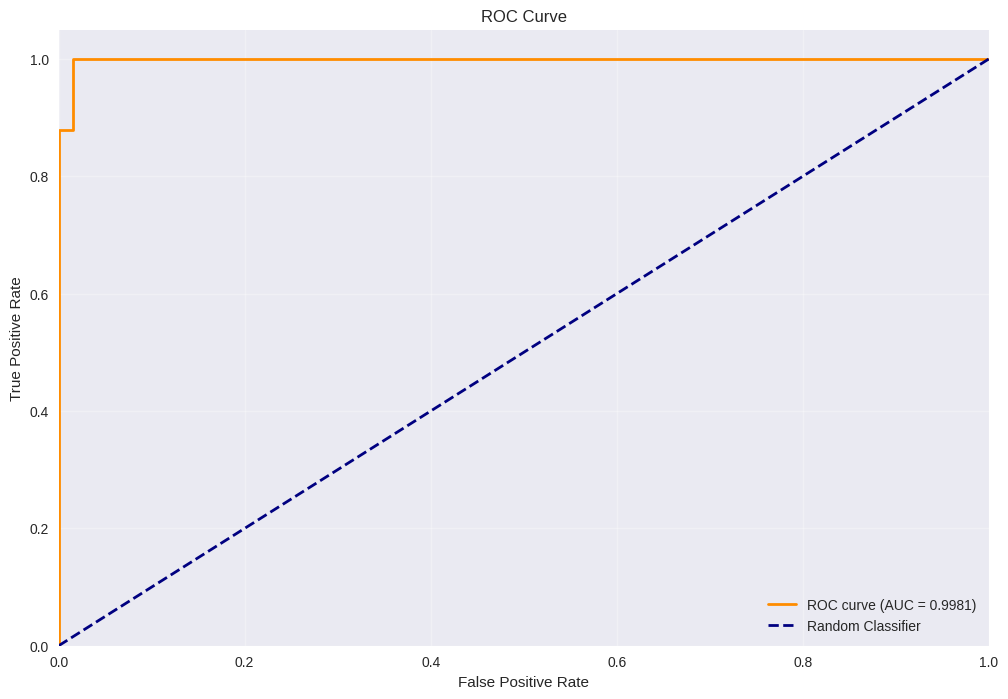

In [19]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 8))

# plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)


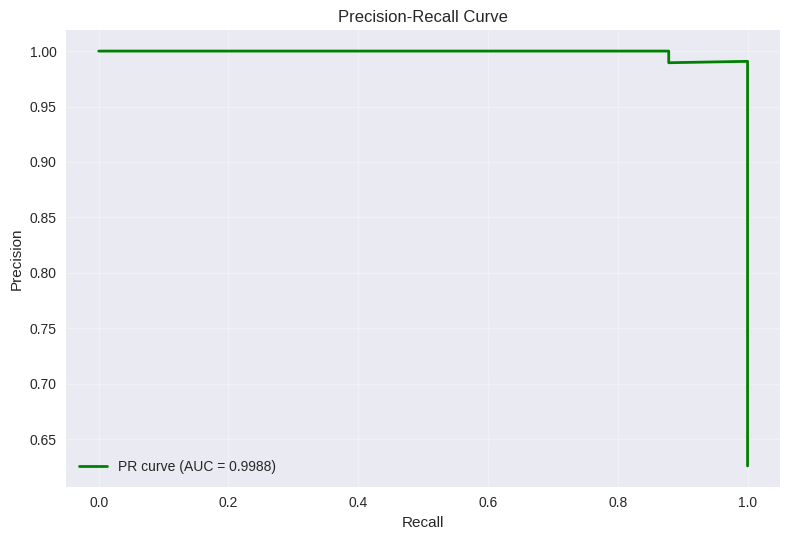

In [20]:

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [23]:
# ## 9. Interactive Prediction Exercise


def predict_tumor_characteristics(feature_values=None):
    """
    Interactive function to make predictions with custom feature values
    """
    if feature_values is None:
        # Use mean values as default
        feature_values = X.mean().values

    # Ensure feature_values is a numpy array and has the right shape
    if isinstance(feature_values, (list, pd.Series)):
        feature_values = np.array(feature_values)

    # Reshape if needed
    if len(feature_values.shape) == 1:
        feature_values = feature_values.reshape(1, -1)

    # Scale the features
    features_scaled = scaler.transform(feature_values)

    # Make prediction
    probability = logreg.predict_proba(features_scaled)[0]
    prediction = logreg.predict(features_scaled)[0]

    print("🎯 TUMOR CLASSIFICATION PREDICTION")
    print("=" * 50)
    print(f"Probability of Benign: {probability[1]:.4f} ({probability[1]*100:.2f}%)")
    print(f"Probability of Malignant: {probability[0]:.4f} ({probability[0]*100:.2f}%)")
    print(f"Predicted Diagnosis: {target_names[prediction]}")

    # Interpretation
    if probability[1] > 0.7:
        print("🔵 HIGH confidence in BENIGN diagnosis")
    elif probability[0] > 0.7:
        print("🔴 HIGH confidence in MALIGNANT diagnosis")
    else:
        print("🟡 MODERATE confidence - near decision boundary")

    return probability, prediction



In [22]:
# Example: Using mean values for each feature class
print("Example 1: Typical benign characteristics")
benign_typical = benign.drop(['target', 'diagnosis'], axis=1).mean().values
predict_tumor_characteristics(benign_typical)

print("\n" + "="*70 + "\n")

print("Example 2: Typical malignant characteristics")
malignant_typical = malignant.drop(['target', 'diagnosis'], axis=1).mean().values
predict_tumor_characteristics(malignant_typical)


Example 1: Typical benign characteristics
🎯 TUMOR CLASSIFICATION PREDICTION
Probability of Benign: 0.9976 (99.76%)
Probability of Malignant: 0.0024 (0.24%)
Predicted Diagnosis: benign
🔵 HIGH confidence in BENIGN diagnosis


Example 2: Typical malignant characteristics
🎯 TUMOR CLASSIFICATION PREDICTION
Probability of Benign: 0.0001 (0.01%)
Probability of Malignant: 0.9999 (99.99%)
Predicted Diagnosis: malignant
🔴 HIGH confidence in MALIGNANT diagnosis


(array([9.99944142e-01, 5.58583558e-05]), np.int64(0))

In [24]:
# Custom example - values that might be ambiguous
print("Example 3: Custom values (potentially ambiguous case)")
custom_features = [
    15.0,  # mean radius
    20.0,  # mean texture
    95.0,  # mean perimeter
    700.0, # mean area
    0.1,   # mean smoothness
    0.15,  # mean compactness
    0.08,  # mean concavity
    0.05,  # mean concave points
    0.18,  # mean symmetry
    0.03,  # mean fractal dimension
    0.4,   # radius error
    1.2,   # texture error
    3.0,   # perimeter error
    45.0,  # area error
    0.005, # smoothness error
    0.03,  # compactness error
    0.03,  # concavity error
    0.01,  # concave points error
    0.02,  # symmetry error
    0.001, # fractal dimension error
    16.0,  # worst radius
    25.0,  # worst texture
    105.0, # worst perimeter
    800.0, # worst area
    0.12,  # worst smoothness
    0.25,  # worst compactness
    0.3,   # worst concavity
    0.15,  # worst concave points
    0.3,   # worst symmetry
    0.08   # worst fractal dimension
]

predict_tumor_characteristics(custom_features)

Example 3: Custom values (potentially ambiguous case)
🎯 TUMOR CLASSIFICATION PREDICTION
Probability of Benign: 0.5277 (52.77%)
Probability of Malignant: 0.4723 (47.23%)
Predicted Diagnosis: benign
🟡 MODERATE confidence - near decision boundary


(array([0.47230653, 0.52769347]), np.int64(1))

In [25]:
# ## 10. Model Limitations & Improvements

print("⚠️ MODEL LIMITATIONS AND CONSIDERATIONS")
print("=" * 50)

limitations = [
    "1. Linear decision boundary may not capture complex relationships",
    "2. Assumes linear relationship between features and log-odds",
    "3. Sensitive to multicollinearity (high correlation between features)",
    "4. Requires feature scaling for proper convergence",
    "5. May struggle with non-linear patterns in the data"
]

for limitation in limitations:
    print(limitation)

⚠️ MODEL LIMITATIONS AND CONSIDERATIONS
1. Linear decision boundary may not capture complex relationships
2. Assumes linear relationship between features and log-odds
3. Sensitive to multicollinearity (high correlation between features)
4. Requires feature scaling for proper convergence
5. May struggle with non-linear patterns in the data


In [27]:
print("\n💡 SUGGESTED IMPROVEMENTS:")
improvements = [
    "• Try regularization (L1/L2) to handle multicollinearity",
    "• Feature selection to reduce dimensionality",
    "• Non-linear models (Random Forest, SVM with kernel)",
    "• Neural networks for complex pattern recognition",
    "• Ensemble methods for improved robustness"
]

for improvement in improvements:
    print(improvement)


💡 SUGGESTED IMPROVEMENTS:
• Try regularization (L1/L2) to handle multicollinearity
• Feature selection to reduce dimensionality
• Non-linear models (Random Forest, SVM with kernel)
• Neural networks for complex pattern recognition
• Ensemble methods for improved robustness


In [28]:
print("\n🔍 KEY INSIGHTS:")
insights = [
    "• Logistic regression performs very well on this dataset (97.7% accuracy)",
    "• 'Worst concave points' is the most important feature for prediction",
    "• The model shows excellent class separation with high-confidence predictions",
    "• Medical applications require special attention to false negatives",
    "• Feature scaling is crucial for logistic regression performance"
]

# FIXED: Changed 'insight' to 'insights' in the loop
for insight in insights:
    print(insight)


🔍 KEY INSIGHTS:
• Logistic regression performs very well on this dataset (97.7% accuracy)
• 'Worst concave points' is the most important feature for prediction
• The model shows excellent class separation with high-confidence predictions
• Medical applications require special attention to false negatives
• Feature scaling is crucial for logistic regression performance
